In [22]:
# outlier
# We use Q1 and Q3, and increase their value 1.5 times both sides and create a boundary using IQR, values outside that boundary are outliers.

In [23]:
import pandas as pd 

titanic_df = pd.read_csv('titanic.csv')

titanic_df.info()

print(titanic_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
   PassengerId  Survived  Pclass                                          Name  ...   Ticket     Fare  Cabin  Embarked
0          892         0       3                              Kelly, Mr. James  ...   330911   7.8292    NaN         Q
1     

In [24]:
def detect_outliers(data, variable):
    Q1 = data[variable].quantile(0.25)
    Q3 = data[variable].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    outliers = data[(data[variable] < lower_bound) | (data[variable] > upper_bound)]
    return outliers

outliers_age = detect_outliers(titanic_df, 'Age')
outliers_fare = detect_outliers(titanic_df, 'Fare')

print("Outliers in Age:")
print(outliers_age[['Age']])
print("\n")
print("Outliers in Fare:")
print(outliers_fare[['Fare']])

# removing outliers
titanic_df_cleaned = titanic_df[~titanic_df.index.isin(outliers_age.index)]
titanic_df_cleaned = titanic_df_cleaned[~titanic_df_cleaned.index.isin(outliers_fare.index)]

titanic_df_cleaned

Outliers in Age:
     Age
81  67.0
96  76.0


Outliers in Fare:
         Fare
12    82.2667
24   262.3750
48    76.2917
53   263.0000
59   262.3750
64   262.3750
69   263.0000
74   211.5000
75   211.5000
81   221.7792
96    78.8500
114  221.7792
118   75.2417
141  151.5500
142  262.3750
150   83.1583
156  221.7792
179   83.1583
181   83.1583
184  247.5208
188   69.5500
196  134.5000
202  227.5250
212   73.5000
217  164.8667
218  211.5000
234   71.2833
236   75.2500
239  106.4250
242  134.5000
252  136.7792
270   75.2417
272  136.7792
287   82.2667
293   81.8583
306  151.5500
308   93.5000
314  135.6333
316  146.5208
324  211.3375
327   79.2000
342   69.5500
343  512.3292
352   73.5000
360   69.5500
365   69.5500
371  134.5000
374   81.8583
375  262.3750
390   93.5000
397   79.2000
400  164.8667
407  211.5000
411   90.0000
414  108.9000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


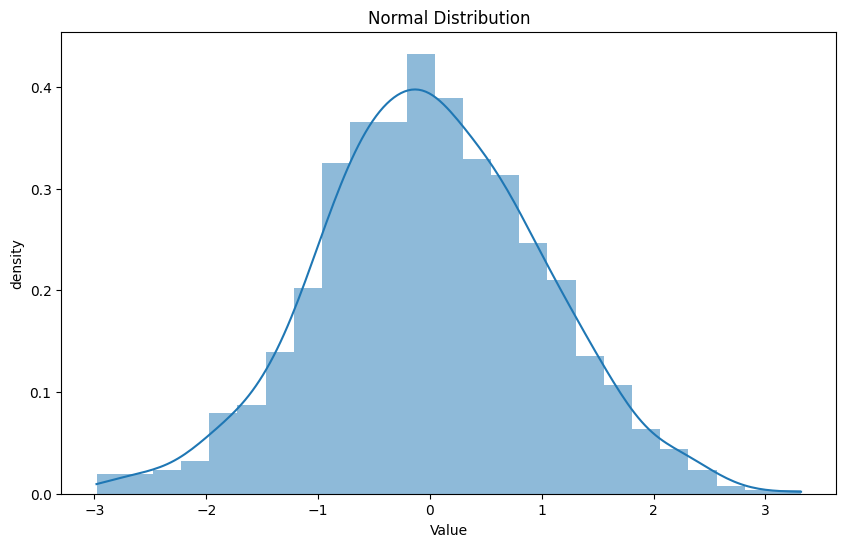

In [25]:
# Normal Distrib 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mu = 0
sigma = 1

data = np.random.normal(mu, sigma, 1000)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat='density', linewidth=0)
plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('density')
plt.show()


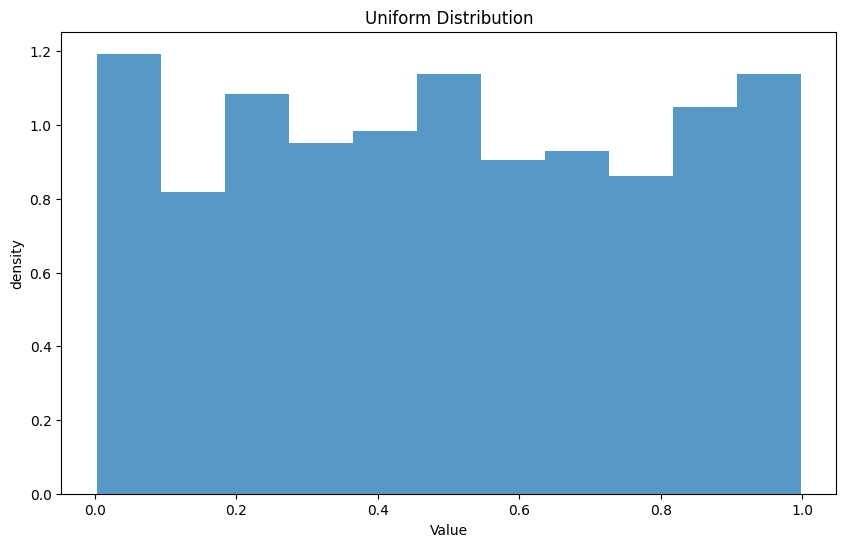

In [26]:
# Uniform Distrib 
import numpy as np
import seaborn as sns
from scipy.stats import uniform
import matplotlib.pyplot as plt

loc = 0
scale = 1

data = np.random.uniform(loc, scale, 1000)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=False, stat='density', linewidth=0)
plt.title('Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('density')
plt.show()

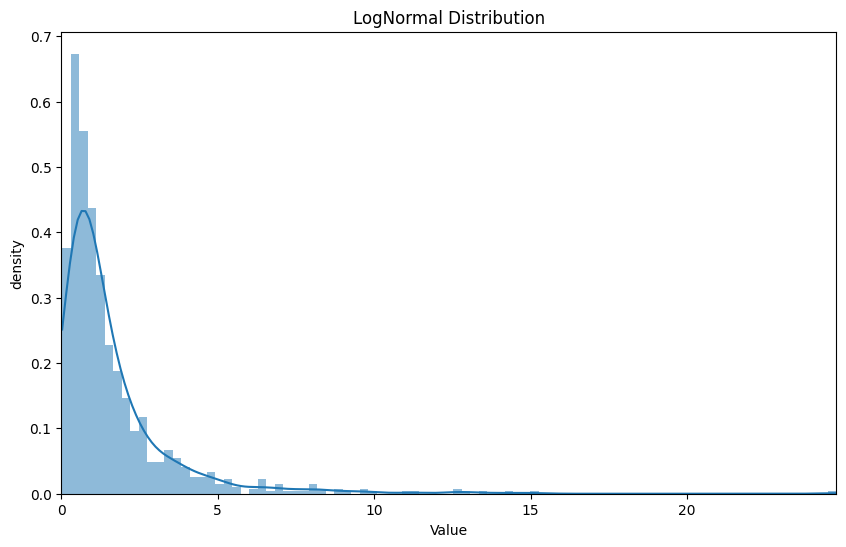

In [27]:
# Log Normal Distrib
# Eg - Developing Country

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

mean = 0
sigma = 1

data = np.random.lognormal(mean, sigma, 1000)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat='density', linewidth=0)
plt.title('LogNormal Distribution')
plt.xlabel('Value')
plt.ylabel('density')
plt.xlim(0, max(data))
plt.show()


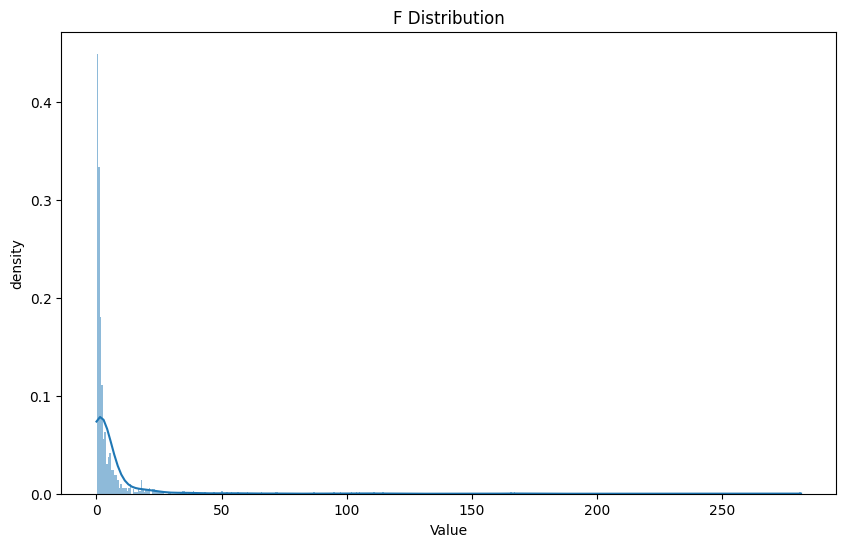

In [31]:
# F Distrib

import numpy as np
import seaborn as sns
from scipy.stats import f
import matplotlib.pyplot as plt

dfn = 5
dfd = 2

data = np.random.f(dfn, dfd, 1000)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat='density', linewidth=0)
plt.title('F Distribution')
plt.xlabel('Value')
plt.ylabel('density')
plt.show()

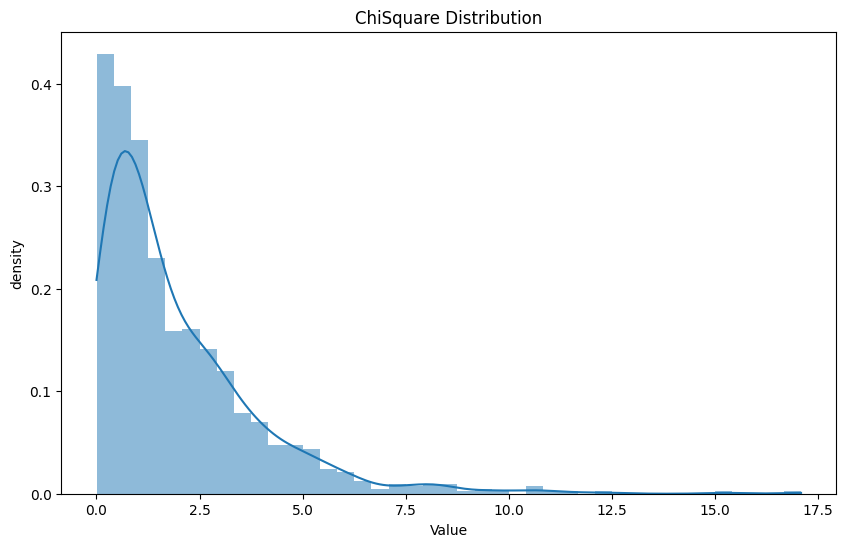

In [32]:
# Chi-Square Testing
from scipy.stats import chi2

df = 2

data = np.random.chisquare(df, 1000)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat='density', linewidth=0)
plt.title('ChiSquare Distribution')
plt.xlabel('Value')
plt.ylabel('density')
plt.show()

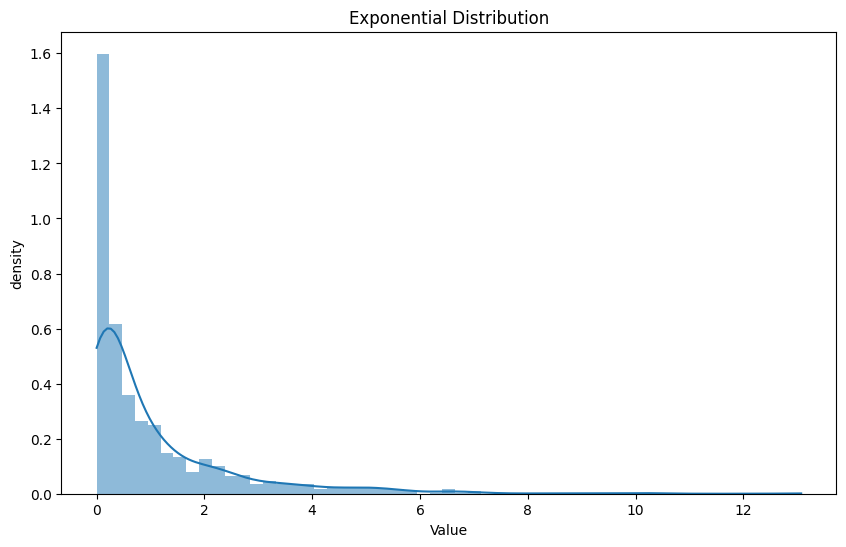

In [33]:
# Exponential Distrib

from scipy.stats import expon

scale = 1

data = np.random.chisquare(scale, 1000)

plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat='density', linewidth=0)
plt.title('Exponential Distribution')
plt.xlabel('Value')
plt.ylabel('density')
plt.show()